In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
try:
    train_data = pd.read_csv('/kaggle/input/route-ai-innovators-challenge/train.csv')
    test_data = pd.read_csv('/kaggle/input/route-ai-innovators-challenge/test.csv')
except Exception:
    train_data = pd.read_csv('Data/train.csv')
    test_data = pd.read_csv('Data/test.csv')

In [3]:
train_data.shape, test_data.shape

((8194, 44), (5642, 43))

In [4]:
train_data

,Unnamed: 0,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,...,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,hospdead
0,2793,79.85199,female,MOSF w/Malig,ARF/MOSF,2,NaN,$11-$25k,0.0,38248.000,...,1.399902,139.0,7.439453,132.0,38.0,1550.0,NaN,1.0,1.000000,0
1,4682,56.93399,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,178049.000,...,0.599976,133.0,7.409180,238.0,25.0,1485.0,NaN,NaN,2.515625,0
2,4518,67.55096,male,MOSF w/Malig,ARF/MOSF,1,NaN,NaN,37.0,49159.000,...,3.099609,129.0,7.339844,108.0,103.0,380.0,NaN,NaN,1.974365,1
3,4499,62.15698,female,ARF/MOSF w/Sepsis,ARF/MOSF,4,8.0,under $11k,0.0,43691.000,...,0.500000,137.0,7.409180,94.0,12.0,1963.0,NaN,NaN,3.624512,0
4,2067,36.36099,male,ARF/MOSF w/Sepsis,ARF/MOSF,3,12.0,NaN,0.0,49378.000,...,0.799927,148.0,7.439453,NaN,NaN,NaN,4.0,3.0,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,8200,84.62695,female,CHF,COPD/CHF/Cirrhosis,4,13.0,NaN,0.0,7392.000,...,1.799805,134.0,NaN,NaN,NaN,NaN,1.0,NaN,1.166900,0
8190,7770,43.60300,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,under $11k,0.0,83252.000,...,0.799927,137.0,7.409180,NaN,NaN,NaN,NaN,2.0,2.000000,0
8191,6259,40.62698,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,NaN,NaN,0.0,62342.000,...,1.099854,132.0,7.419922,NaN,NaN,NaN,NaN,0.0,0.000000,0
8192,1829,80.15900,male,ARF/MOSF w/Sepsis,ARF/MOSF,2,11.0,$25-$50k,0.0,131511.000,...,1.899902,141.0,7.399414,NaN,NaN,NaN,NaN,1.0,1.000000,0


In [5]:
test_data

,Unnamed: 0,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
0,8739,71.688976,female,ARF/MOSF w/Sepsis,COPD/CHF/Cirrhosis,2,11.925135,$25-$50k,-0.420200,3077.753246,...,6.757764,0.291617,133.557832,7.565056,NaN,NaN,77.887056,-0.661563,NaN,4.834415
1,3160,69.209076,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,-0.902741,27825.014065,...,1.426255,0.447083,138.192835,7.718179,NaN,42.736036,3447.234913,NaN,-0.073922,5.477227
2,8600,63.228000,male,MOSF w/Malig,ARF/MOSF,1,16.000000,>$50k,0.000000,33619.000000,...,2.199707,3.399902,138.000000,7.339844,NaN,NaN,NaN,NaN,0.000000,0.000000
3,8270,76.894960,male,MOSF w/Malig,ARF/MOSF,2,19.000000,NaN,9.000000,29263.000000,...,NaN,1.399902,135.000000,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000
4,11109,55.843018,male,Lung Cancer,Cancer,0,0.526638,$25-$50k,0.150011,NaN,...,2.438160,1.087291,143.360613,NaN,210.128631,2.169189,2233.392422,-0.485371,NaN,2.025654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,9098,65.091115,female,ARF/MOSF w/Sepsis,Cancer,1,11.936099,NaN,35.400672,241158.739167,...,0.310178,0.456933,144.496289,7.678191,117.983502,6.452681,NaN,NaN,1.213162,0.530515
5638,7168,98.709977,female,CHF,COPD/CHF/Cirrhosis,2,3.091045,$25-$50k,-0.383597,572452.086559,...,-0.126419,0.825361,139.538872,7.623945,96.524142,NaN,NaN,NaN,0.727876,-0.014936
5639,5808,62.061980,male,Coma,Coma,0,16.000000,>$50k,9.000000,105947.000000,...,NaN,0.699951,139.000000,NaN,NaN,5.000000,2000.000000,NaN,NaN,1.856934
5640,2411,21.506000,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,12.000000,$11-$25k,0.000000,78420.438000,...,0.799927,0.699951,137.000000,7.419922,NaN,NaN,NaN,NaN,0.000000,0.000000


In [6]:
COLUMN_NAME = 'Unnamed: 0'
y_train = train_data.hospdead
username_train_data = train_data[COLUMN_NAME]
username_test_data = test_data[COLUMN_NAME]

train_data.sex = train_data.sex.replace({'male': 1, 'female': 0})
test_data.sex = test_data.sex.replace({'male': 1, 'female': 0})
train_data.edu = np.array(train_data.edu).astype('float64')

x_train = train_data.drop(['hospdead', COLUMN_NAME], axis=1, inplace=True)
x_test = test_data.drop([COLUMN_NAME], axis=1, inplace=True)

In [7]:
train_data.shape, test_data.shape

((8194, 42), (5642, 42))

In [8]:
train_data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
0,79.85199,0,MOSF w/Malig,ARF/MOSF,2,NaN,$11-$25k,0.0,38248.000,22160.5938,...,NaN,1.399902,139.0,7.439453,132.0,38.0,1550.0,NaN,1.0,1.000000
1,56.93399,1,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,178049.000,106424.4380,...,NaN,0.599976,133.0,7.409180,238.0,25.0,1485.0,NaN,NaN,2.515625
2,67.55096,1,MOSF w/Malig,ARF/MOSF,1,NaN,NaN,37.0,49159.000,30353.2031,...,NaN,3.099609,129.0,7.339844,108.0,103.0,380.0,NaN,NaN,1.974365
3,62.15698,0,ARF/MOSF w/Sepsis,ARF/MOSF,4,8.0,under $11k,0.0,43691.000,27075.0625,...,1.899902,0.500000,137.0,7.409180,94.0,12.0,1963.0,NaN,NaN,3.624512
4,36.36099,1,ARF/MOSF w/Sepsis,ARF/MOSF,3,12.0,NaN,0.0,49378.000,20026.4531,...,5.000000,0.799927,148.0,7.439453,NaN,NaN,NaN,4.0,3.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,84.62695,0,CHF,COPD/CHF/Cirrhosis,4,13.0,NaN,0.0,7392.000,6289.4883,...,0.199982,1.799805,134.0,NaN,NaN,NaN,NaN,1.0,NaN,1.166900
8190,43.60300,0,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,under $11k,0.0,83252.000,69330.6250,...,NaN,0.799927,137.0,7.409180,NaN,NaN,NaN,NaN,2.0,2.000000
8191,40.62698,1,ARF/MOSF w/Sepsis,ARF/MOSF,0,NaN,NaN,0.0,62342.000,45183.9688,...,3.899902,1.099854,132.0,7.419922,NaN,NaN,NaN,NaN,0.0,0.000000
8192,80.15900,1,ARF/MOSF w/Sepsis,ARF/MOSF,2,11.0,$25-$50k,0.0,131511.000,100763.6880,...,NaN,1.899902,141.0,7.399414,NaN,NaN,NaN,NaN,1.0,1.000000


In [9]:
x_train = pd.get_dummies(train_data)

In [10]:
x_train

,age,sex,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,...,race_black,race_hispanic,race_other,race_white,ca_metastatic,ca_no,ca_yes,dnr_dnr after sadm,dnr_dnr before sadm,dnr_no dnr
0,79.85199,0,2,NaN,0.0,38248.000,22160.5938,22123.84380,14.750000,26.597656,...,False,False,False,True,True,False,False,True,False,False
1,56.93399,1,1,NaN,0.0,178049.000,106424.4380,118616.00000,27.333328,23.199219,...,False,False,False,True,False,False,True,False,False,True
2,67.55096,1,1,NaN,37.0,49159.000,30353.2031,25562.00000,31.000000,59.195312,...,False,False,False,False,False,False,True,False,False,True
3,62.15698,0,4,8.0,0.0,43691.000,27075.0625,25739.00000,22.000000,38.195312,...,True,False,False,False,False,True,False,False,False,True
4,36.36099,1,3,12.0,0.0,49378.000,20026.4531,NaN,27.666656,27.097656,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,84.62695,0,4,13.0,0.0,7392.000,6289.4883,5005.32812,11.500000,15.798828,...,False,False,False,True,False,True,False,False,False,True
8190,43.60300,0,1,NaN,0.0,83252.000,69330.6250,2246.68945,26.000000,27.296875,...,False,False,False,True,False,True,False,True,False,False
8191,40.62698,1,0,NaN,0.0,62342.000,45183.9688,44790.03120,44.666657,26.597656,...,False,False,False,True,False,True,False,False,False,True
8192,80.15900,1,2,11.0,0.0,131511.000,100763.6880,NaN,29.000000,26.796875,...,False,False,False,True,False,True,False,True,False,False


In [11]:
x_train.isnull().sum()

age                       0
sex                       0
num.co                    0
edu                    1486
scoma                     1
                       ... 
ca_no                     0
ca_yes                    0
dnr_dnr after sadm        0
dnr_dnr before sadm       0
dnr_no dnr                0
Length: 63, dtype: int64

In [12]:
for i in x_train.columns:
    x_train[i] = x_train[i].replace({np.nan: x_train[i].mean()})

In [13]:
x_train.isnull().sum()

age                    0
sex                    0
num.co                 0
edu                    0
scoma                  0
                      ..
ca_no                  0
ca_yes                 0
dnr_dnr after sadm     0
dnr_dnr before sadm    0
dnr_no dnr             0
Length: 63, dtype: int64

In [14]:
y_train

0       0
1       0
2       1
3       0
4       0
       ..
8189    0
8190    0
8191    0
8192    0
8193    0
Name: hospdead, Length: 8194, dtype: int64

In [15]:
x_train.dtypes

age                    float64
sex                      int64
num.co                   int64
edu                    float64
scoma                  float64
                        ...   
ca_no                     bool
ca_yes                    bool
dnr_dnr after sadm        bool
dnr_dnr before sadm       bool
dnr_no dnr                bool
Length: 63, dtype: object

In [16]:
x_train = x_train.astype('float64')
x_train

,age,sex,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,...,race_black,race_hispanic,race_other,race_white,ca_metastatic,ca_no,ca_yes,dnr_dnr after sadm,dnr_dnr before sadm,dnr_no dnr
0,79.85199,0.0,2.0,11.756857,0.0,38248.000,22160.5938,22123.843800,14.750000,26.597656,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,56.93399,1.0,1.0,11.756857,0.0,178049.000,106424.4380,118616.000000,27.333328,23.199219,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,67.55096,1.0,1.0,11.756857,37.0,49159.000,30353.2031,25562.000000,31.000000,59.195312,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,62.15698,0.0,4.0,8.000000,0.0,43691.000,27075.0625,25739.000000,22.000000,38.195312,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,36.36099,1.0,3.0,12.000000,0.0,49378.000,20026.4531,29013.560651,27.666656,27.097656,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,84.62695,0.0,4.0,13.000000,0.0,7392.000,6289.4883,5005.328120,11.500000,15.798828,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8190,43.60300,0.0,1.0,11.756857,0.0,83252.000,69330.6250,2246.689450,26.000000,27.296875,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8191,40.62698,1.0,0.0,11.756857,0.0,62342.000,45183.9688,44790.031200,44.666657,26.597656,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8192,80.15900,1.0,2.0,11.000000,0.0,131511.000,100763.6880,29013.560651,29.000000,26.796875,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
x_test = pd.get_dummies(test_data)

In [18]:
x_test

,age,sex,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,...,race_black,race_hispanic,race_other,race_white,ca_metastatic,ca_no,ca_yes,dnr_dnr after sadm,dnr_dnr before sadm,dnr_no dnr
0,71.688976,0,2,11.925135,-0.420200,3077.753246,2239.350837,-343.020136,16.277081,24.177659,...,True,False,False,False,True,False,False,False,False,True
1,69.209076,1,1,NaN,-0.902741,27825.014065,8410.182419,4388.697213,10.425382,18.338292,...,False,False,False,True,True,False,False,False,False,True
2,63.228000,1,1,16.000000,0.000000,33619.000000,13934.828100,NaN,50.500000,42.093750,...,False,False,False,True,False,False,True,True,False,False
3,76.894960,1,2,19.000000,9.000000,29263.000000,19455.640600,23673.187500,23.333328,23.398438,...,False,False,False,True,False,False,True,False,True,False
4,55.843018,1,0,0.526638,0.150011,NaN,2392.484906,18218.979794,31.428774,40.276937,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,65.091115,0,1,11.936099,35.400672,241158.739167,42.182202,9636.949634,10.052230,35.222186,...,False,False,False,True,False,True,False,True,False,False
5638,98.709977,0,2,3.091045,-0.383597,572452.086559,334.294567,2937.612852,45.463001,25.551068,...,False,False,False,True,False,True,False,False,False,True
5639,62.061980,1,0,16.000000,9.000000,105947.000000,42417.343800,43350.906200,43.000000,25.199219,...,False,False,False,True,False,True,False,False,False,True
5640,21.506000,0,0,12.000000,0.000000,78420.438000,50620.812500,NaN,36.500000,27.000000,...,True,False,False,False,False,True,False,False,False,True


In [19]:
x_test.isnull().sum()

age                       0
sex                       0
num.co                    0
edu                    1077
scoma                     0
                       ... 
ca_no                     0
ca_yes                    0
dnr_dnr after sadm        0
dnr_dnr before sadm       0
dnr_no dnr                0
Length: 63, dtype: int64

In [20]:
for i in x_test.columns:
    x_test[i] = x_test[i].replace({np.nan: x_test[i].mean()})

In [21]:
x_test.isnull().sum()

age                    0
sex                    0
num.co                 0
edu                    0
scoma                  0
                      ..
ca_no                  0
ca_yes                 0
dnr_dnr after sadm     0
dnr_dnr before sadm    0
dnr_no dnr             0
Length: 63, dtype: int64

In [22]:
x_test = x_test.astype('float64')

In [23]:
x_test

,age,sex,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,...,race_black,race_hispanic,race_other,race_white,ca_metastatic,ca_no,ca_yes,dnr_dnr after sadm,dnr_dnr before sadm,dnr_no dnr
0,71.688976,0.0,2.0,11.925135,-0.420200,3077.753246,2239.350837,-343.020136,16.277081,24.177659,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,69.209076,1.0,1.0,11.384944,-0.902741,27825.014065,8410.182419,4388.697213,10.425382,18.338292,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,63.228000,1.0,1.0,16.000000,0.000000,33619.000000,13934.828100,22465.036844,50.500000,42.093750,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,76.894960,1.0,2.0,19.000000,9.000000,29263.000000,19455.640600,23673.187500,23.333328,23.398438,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55.843018,1.0,0.0,0.526638,0.150011,65890.962615,2392.484906,18218.979794,31.428774,40.276937,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,65.091115,0.0,1.0,11.936099,35.400672,241158.739167,42.182202,9636.949634,10.052230,35.222186,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5638,98.709977,0.0,2.0,3.091045,-0.383597,572452.086559,334.294567,2937.612852,45.463001,25.551068,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5639,62.061980,1.0,0.0,16.000000,9.000000,105947.000000,42417.343800,43350.906200,43.000000,25.199219,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5640,21.506000,0.0,0.0,12.000000,0.000000,78420.438000,50620.812500,22465.036844,36.500000,27.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
model = keras.Sequential(
    [
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
h = model.fit(
    x_train, 
    y_train, 
    epochs=500
)

Epoch 1/500
257/257 [==============================] - 2s 2ms/step - loss: 195.9247 - accuracy: 0.6390
Epoch 2/500
257/257 [==============================] - 1s 2ms/step - loss: 146.5028 - accuracy: 0.6574
Epoch 3/500
257/257 [==============================] - 1s 2ms/step - loss: 116.1679 - accuracy: 0.6918
Epoch 4/500
257/257 [==============================] - 0s 2ms/step - loss: 106.9428 - accuracy: 0.6916
Epoch 5/500
257/257 [==============================] - 1s 2ms/step - loss: 133.4362 - accuracy: 0.7116
Epoch 6/500
257/257 [==============================] - 1s 2ms/step - loss: 221.7294 - accuracy: 0.6912
Epoch 7/500
257/257 [==============================] - 1s 2ms/step - loss: 73.6933 - accuracy: 0.7120
Epoch 8/500
257/257 [==============================] - 0s 2ms/step - loss: 81.4383 - accuracy: 0.7250
Epoch 9/500
257/257 [==============================] - 0s 2ms/step - loss: 53.8469 - accuracy: 0.7387
Epoch 10/500
257/257 [==============================] - 1s 2ms/step - loss: 

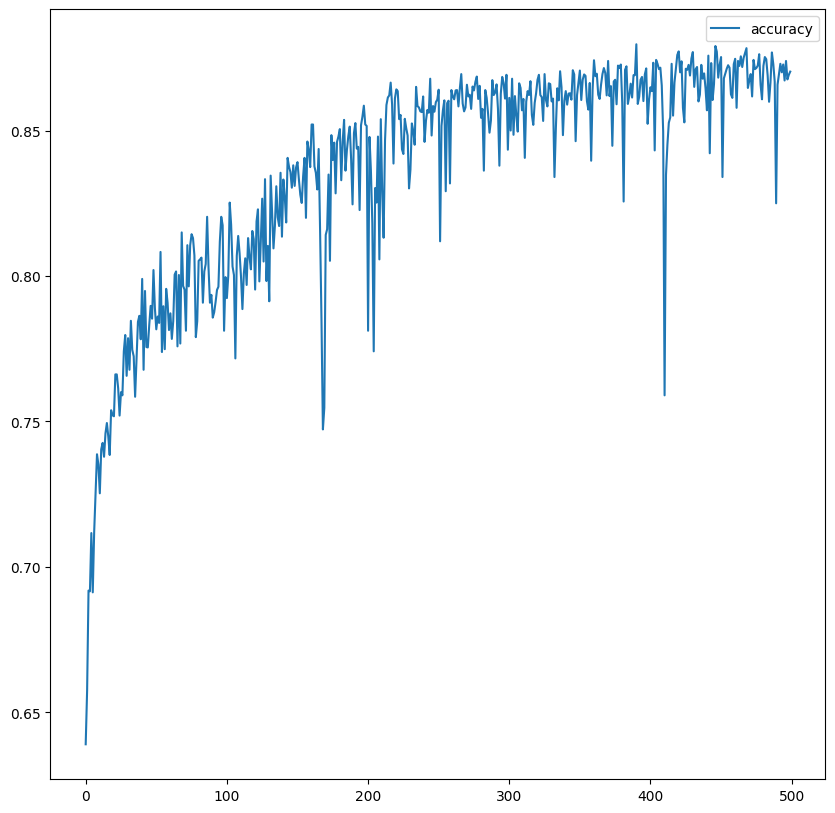

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(h.history['accuracy'])
#plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [28]:
model.evaluate(x_train, y_train)

257/257 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.8850


[0.2817401885986328, 0.8850378394126892]

In [29]:
y_pred = model.predict(x_test)

177/177 [==============================] - 0s 1ms/step


In [30]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [31]:
y_pred = y_pred.reshape(-1)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [32]:
submission = pd.DataFrame(
    {
        'id': username_test_data,
        'hospdead': y_pred
    }
)
submission.to_csv('submission.csv', index=False)